
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 3
-----

In [20]:
import pandas as pd

import matplotlib.pyplot as plt

import os
import sys

-----
##### Set up input / output directories

In [21]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [22]:
sys.path.append(str(root_dir))
import scripts.plotter as plotter
import scripts.utils as ut

-----
##### Load & prepare data 

In [23]:
root_dir = '/Users/mehdi/Documents/Nature_Submission'

In [5]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.txt'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [6]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 70), (577, 70))

In [8]:
kzm611_md_low = kzm611_md[kzm611_md.Burden=='low'].copy()
kzm611_sbs_low = kzm611_sigs_low[[x for x in kzm611_sigs_low.columns if x.startswith('SBS')]].copy()
kzm611_sbs = kzm611_sigs[[x for x in kzm611_sigs.columns if x.startswith('SBS')]].copy()


-----------
## Panel a

In [ ]:
plat_sbs = ['SBS31', 'SBS35']
plat_nov_sbs = ['SBS288L5']
plat_nov_dbs = ['DBS78H2']
thr_sbs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87']
thr_nov_sbs = ['SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']

In [ ]:
known = [kzm611_sigs_low.DBS5.sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('DBS')]].sum().sum(),
         kzm611_sigs_low[plat_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum(),
         kzm611_sigs_low[thr_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum() 
        ]

novel = [kzm611_sigs_low[plat_nov_dbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('DBS')]].sum().sum(),
         kzm611_sigs_low[plat_nov_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum(),
         kzm611_sigs_low[thr_nov_sbs].sum().sum() / kzm611_sigs_low[[x for x in kzm611_sigs_low if x.startswith('SBS')]].sum().sum()
         ]
index = ['Therapy/\nPlatinum\nDBS', 'Platinum\nSBS', 'Therapy\nSBS']
df = pd.DataFrame({'COSMIC': known, 'Novel': novel}, index=index)
df = df * 100
df = df.round(2)
df

,COSMIC,Novel
Therapy/\nPlatinum\nDBS,13.50,25.67
Platinum\nSBS,9.68,2.25
Therapy\nSBS,11.23,8.70


[None, None, None, None, None, None]

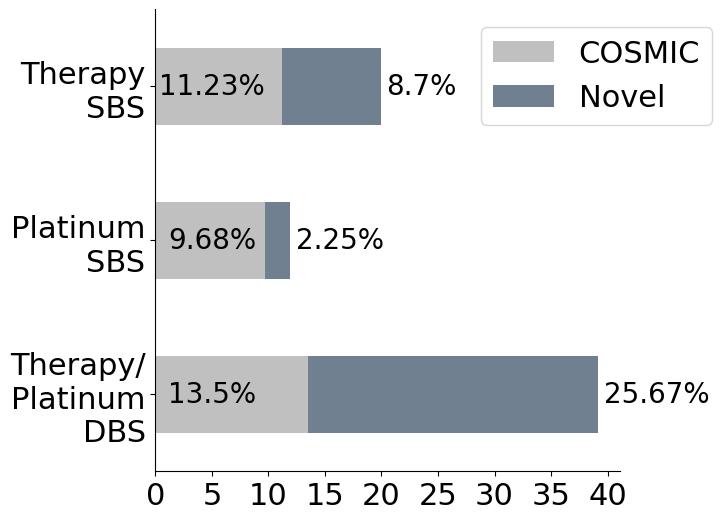

In [12]:
fig, ax = plt.subplots(figsize=(6,6))


df.plot.barh(stacked=True, ax=ax, color=['silver', 'slategrey'])
for i, v in enumerate(df.COSMIC):
    ax.text(5, i-0.05, f"{v}%", color='black', ha='center', fontsize=20)
    ax.text(v + df.Novel.iloc[i]+0.5, i-0.05, f"{df.Novel.iloc[i]}%", color='black', fontsize=20)

ax.spines[['right', 'top']].set_visible(False)

#ax.set_facecolor('#f4f0eb')
h, l = ax.get_legend_handles_labels()
legend = ax.legend(h,l, loc=(0.7, 0.75), fontsize=22)

plt.setp(ax.get_xticklabels(), horizontalalignment='center', fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=22)


#plt.savefig(os.path.join(fig_out, 'Fig_3a_rev.pdf'), bbox_inches="tight")

-----------
## Panel b

In [13]:
kzm611_thr_low_mlt = ut.sigs_melt(kzm611_sigs.loc[low_samples, thr_sbs+thr_nov_sbs].copy())
kzm611_thr_all_mlt = ut.sigs_melt(kzm611_sigs[thr_sbs+thr_nov_sbs].copy())

kzm611_thr_all_mlt.head(3)

,Samples,Signatures,Mutations
0,I-H-108298-T1-1-D1-1,SBS11,0
1,I-H-108317-T1-1-D1-1,SBS11,0
2,I-H-108319-T1-1-D1-1,SBS11,0


4.9


/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:759: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  y_values = groups.get_group(names[i])["log10BURDENpMB"].sort_values(ascending = True).values.tolist()
/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:760: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_values = list(np.linspace(start = X_start, stop = X_end, num = counts[i]))
/Users/mehdi/Documents/MyRepos/mutsigs_therapy/scripts/plotter.py:762: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

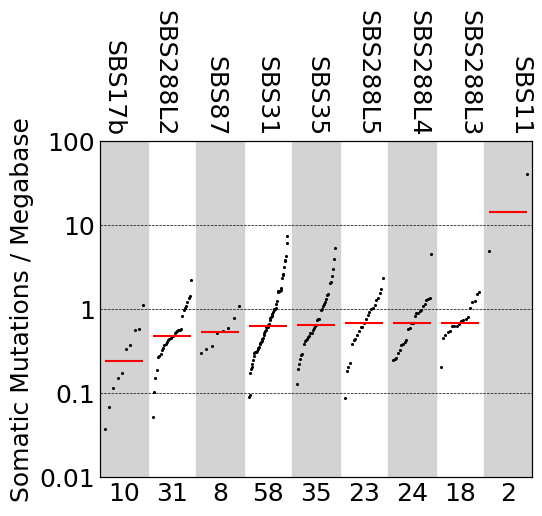

In [14]:
plotter.plotTMB_generic(kzm611_thr_all_mlt[['Signatures', 'Mutations']].copy(), scale='genome')
#plt.savefig(os.path.join(fig_out, 'Fig_3b_rev.pdf'), bbox_inches="tight")

-----------
## Panel c

In [42]:
logreg_coefs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_drug_sigs_single_assocs.txt'), sep='\t')

CN25


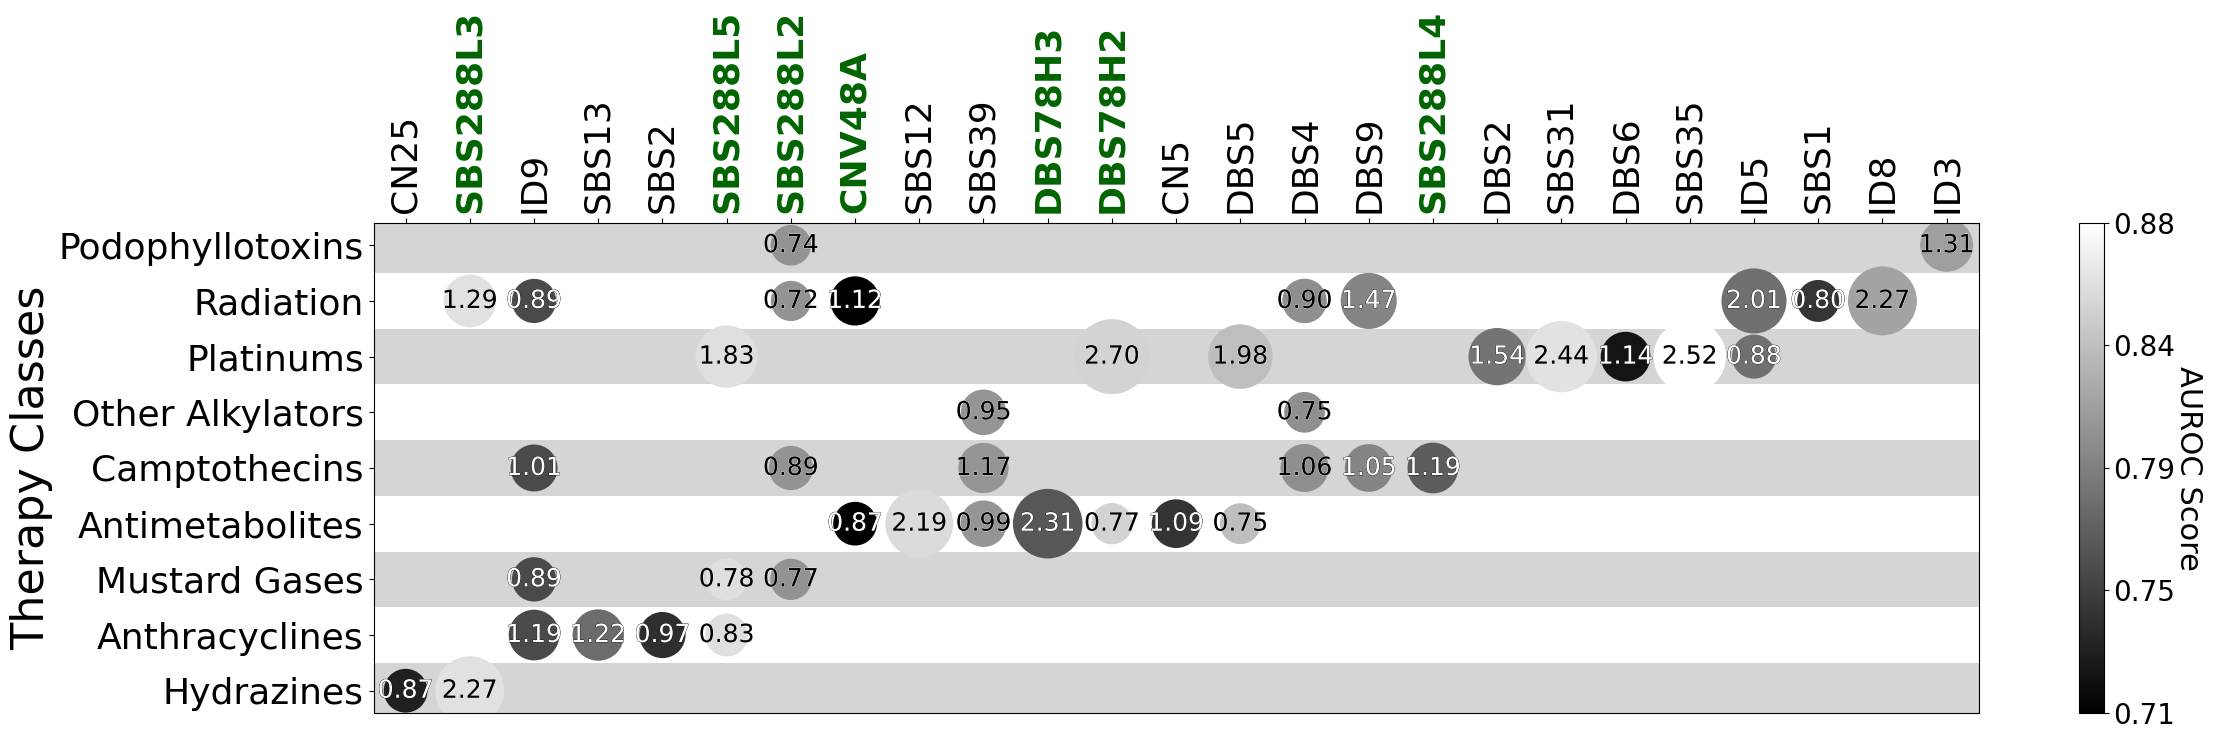

In [43]:
data = logreg_coefs[logreg_coefs.Condition=='class_sigs_noX_all'].copy()
data = data[data.AUC>=0.7]

drug_order = ['Radiation', 'Platinums', 'OtherAlkylators', 'Camptothecins',
              'Antimetabolites', 'MustardGases',
              'Anthracyclines', 'VincaAlkaloids', 'Hydrazines']

data['Drug_cat'] = pd.Categorical(
    data['Features'], 
    categories=drug_order, 
    ordered=True
)

data = data.sort_values(['Drug_cat'], ignore_index=True, ascending=[False])

rename_dict = {'OtherAlkylators': 'Other Alkylators', 'MustardGases': 'Mustard Gases', 'VincaAlkaloids': 'Vinca Alkaloids'}
data['Features'] = data['Features'].map(rename_dict).fillna(data['Features'])

plotter.coefs_scatter(data, os.path.join(fig_out, 'Fig_3c_adj2_rev3.pdf'), positive_only=True, interactions='singles_only', ylab='Therapy Classes')

-----------
## Panel d

SBS1


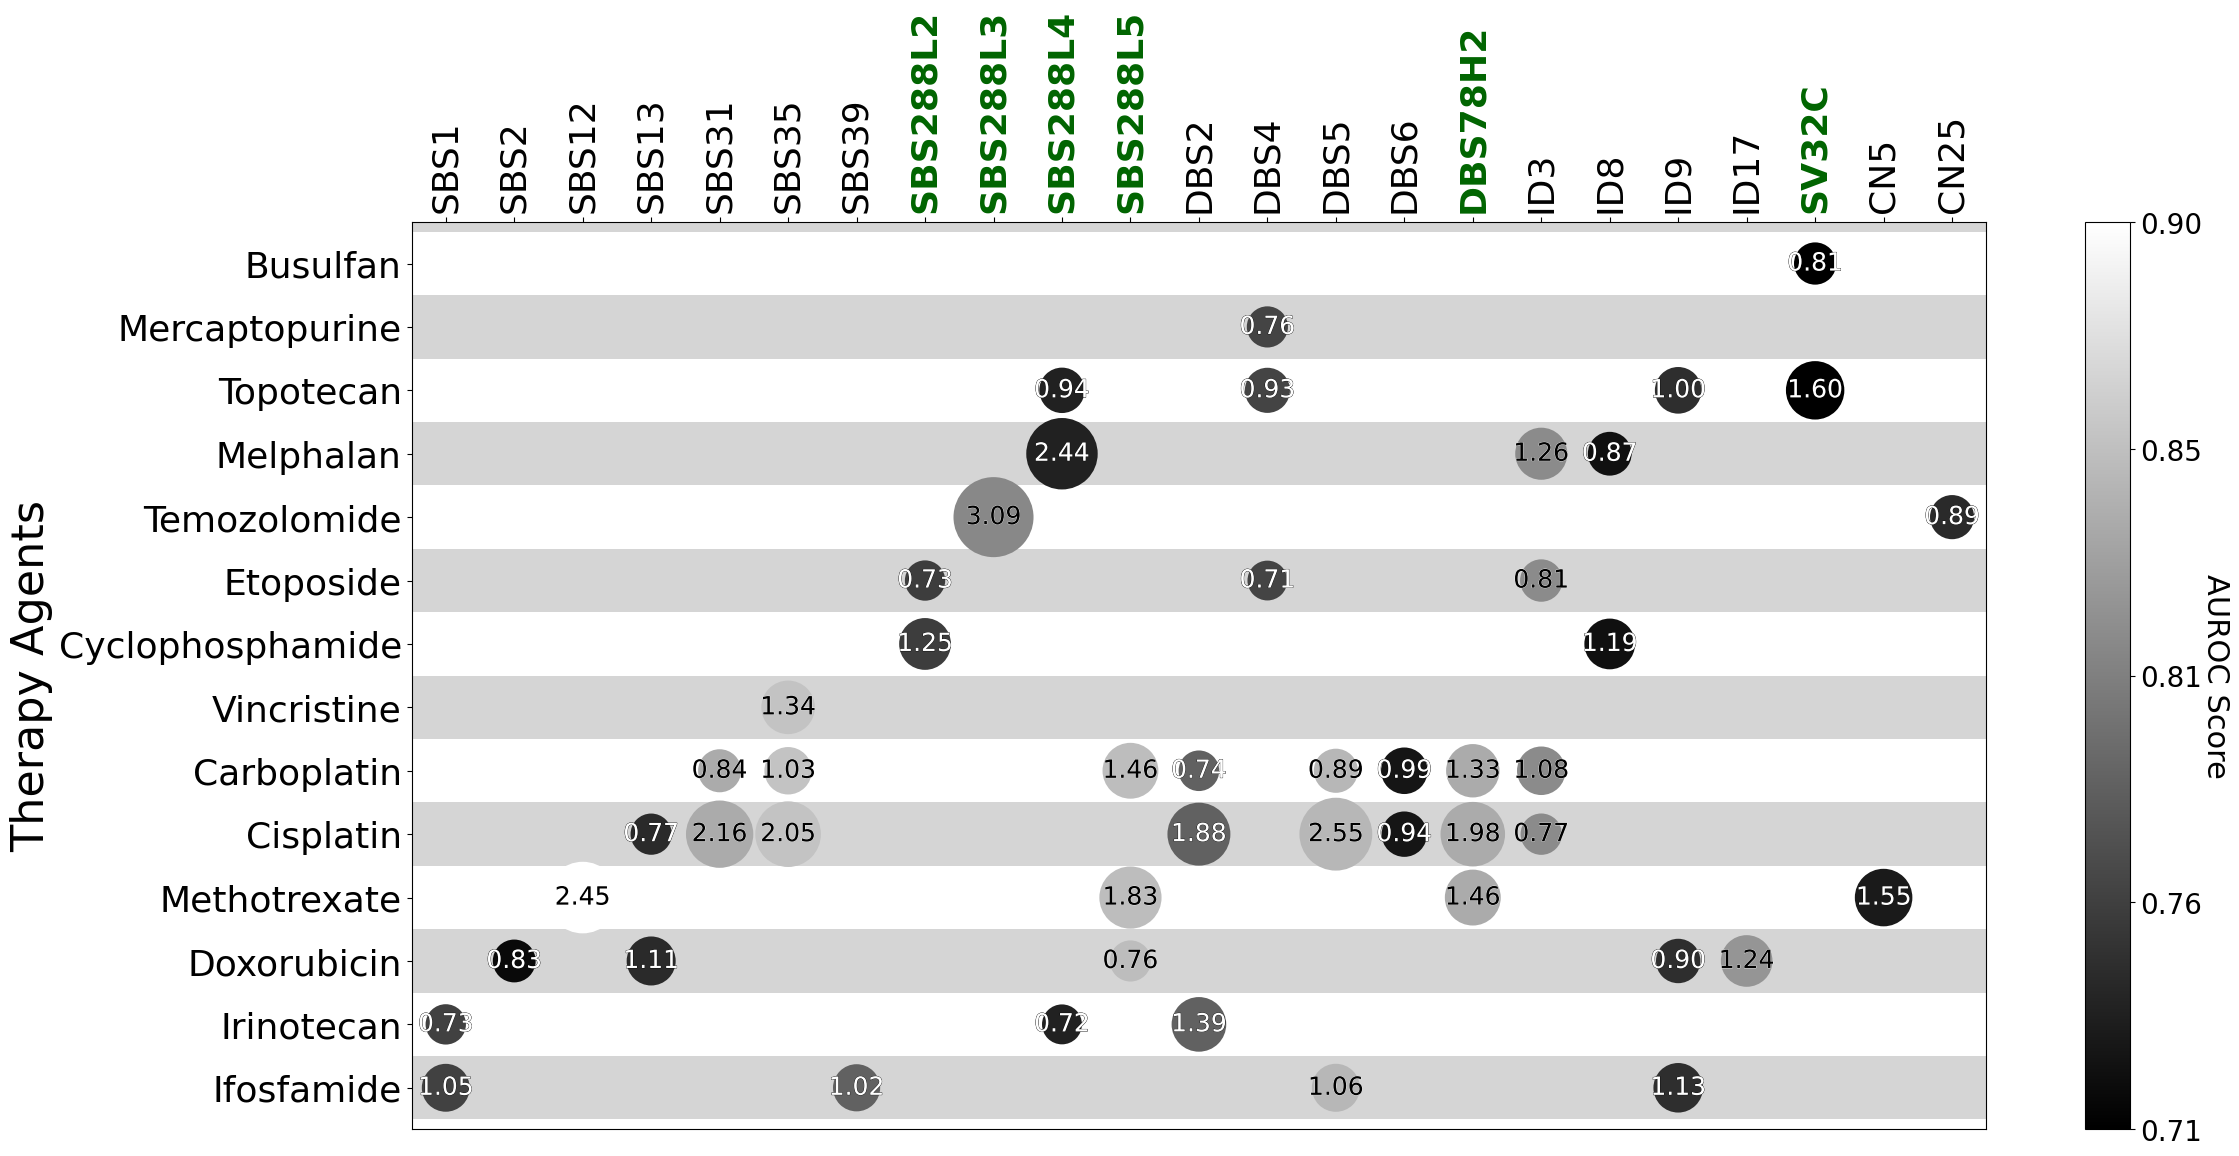

In [41]:
data = logreg_coefs[logreg_coefs.Condition=='agent_sigs_noX_all'].copy()
data = data[data.AUC>=0.7]

plotter.coefs_scatter(data, os.path.join(fig_out, 'Fig_3d_adj_rev3.pdf'), positive_only=True, interactions='singles_only', ylab='Therapy Agents')